## K-Means and MiniBatchKMeans clustering algorithms

In [78]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.pipeline import make_pipeline
from sklearn.metrics.pairwise import pairwise_distances_argmin

import time

from sklearn.datasets import make_blobs

#### Generate the data
We start by generating the blobs of data to be clustered.

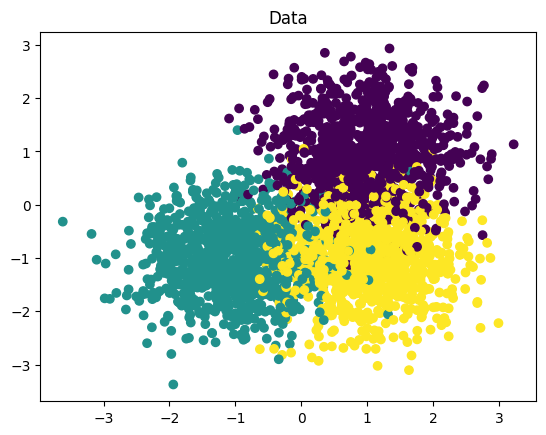

In [7]:
np.random.seed(0)


centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)

plt.scatter(X[:, 0], X[:, 1], c=labels_true)
plt.title('Data');

In [24]:
def clustering(algo, X, y):
    t0 = time.time()
    y_preds = algo.fit_predict(X)
    time_elapsed = time.time() - t0
    return y_preds, time_elapsed

def plot_prediction(y_preds, time_elapsed, algo='clustering'):
    plt.figure(figsize=(15, 4))
    plt.subplot(121)
    plt.scatter(X[:, 0], X[:, 1], c=labels_true)
    plt.title('Data');
    plt.subplot(122)
    plt.scatter(X[:, 0], X[:, 1], c=y_preds)
    plt.title('Prediction');
    plt.suptitle(f'{algo} Time cost : {time_elapsed}')

### Compute clustering with Kmeans

In [77]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
y_preds, time_elapsed = clustering(kmeans, X, labels_true)

plot_prediction(y_preds, time_elapsed, algo='Kmeans clustering')

<img src='./plots/Kmeans-vs-minibatch-plot-1.png'>

### Compute clustering with MiniBatchKMeans

In [76]:
mini = MiniBatchKMeans(n_clusters=3, n_init=10, batch_size=32, random_state=42, max_no_improvement=10)
y_preds, time_elapsed = clustering(mini, X, labels_true)

plot_prediction(y_preds, time_elapsed, algo='MiniBatchKMeans clustering')

<img src='./plots/Kmeans-vs-minibatch-plot-2.png'>

### Establishing parity between clusters

We want to have the same color for the same cluster from both the MiniBatchKMeans and the KMeans algorithm. Let’s pair the cluster centers per closest one.

`from sklearn.metrics.pairwise import pairwise_distances_argmin`
* Compute minimum distances between one point and a set of points.
* This function computes for each row in `X`, the index of the row of `Y` which is closest 
* Returns : `Y[argmin[i], :]` is the row in Y that is closest to `X[i, :]`.



In [79]:
k_means_cluster_centers = kmeans.cluster_centers_
order = pairwise_distances_argmin(k_means_cluster_centers, mini.cluster_centers_)

mini_batch_kmeans_cluster_centers = mini.cluster_centers_[order]

In [83]:
kmeans_labels =  pairwise_distances_argmin(X, k_means_cluster_centers)
mini_batch_labels =  pairwise_distances_argmin(X, mini_batch_kmeans_cluster_centers)

In [92]:
colors = plt.cm.nipy_spectral(np.linspace(0,1,3).astype('float')/3)

In [149]:
plt.figure(figsize=(15, 4))

plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=colors[kmeans_labels], marker='.', s=2)
plt.scatter(k_means_cluster_centers[:, 0], k_means_cluster_centers[:, 1],
 c=colors, edgecolors='w', alpha=0.7, s=100)
plt.title('kmeans');

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=colors[mini_batch_labels], marker='.', s=2)
plt.scatter(mini_batch_kmeans_cluster_centers[:, 0], mini_batch_kmeans_cluster_centers[:, 1],
 c=colors, edgecolors='w', alpha=0.7, s=100)
plt.title('mini-batch-kmeans');

# initialize an array of zeros for diff
difference = np.zeros(shape=(X.shape[0])).astype('bool')
for cluster in range(n_clusters): 
    A = (kmeans_labels == cluster)
    B = (mini_batch_labels == cluster)
    # difference in cluster labels
    difference += np.not_equal(A, B)

# find the identical labeling
identical = np.logical_not(difference)

plt.subplot(133)
plt.scatter(X[identical, 0], X[identical, 1], c='grey', marker='.', s=2)
plt.scatter(X[difference, 0], X[difference, 1], c='r', marker='o', s=4)
plt.title('Difference');


<img src='./plots/Kmeans-vs-minibatch-plot-3.png'>